In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets, manifold

In [2]:
data = datasets.fetch_openml("mnist_784",version=1,return_X_y=True)
pixels, targets = data
targets = targets.astype(int)

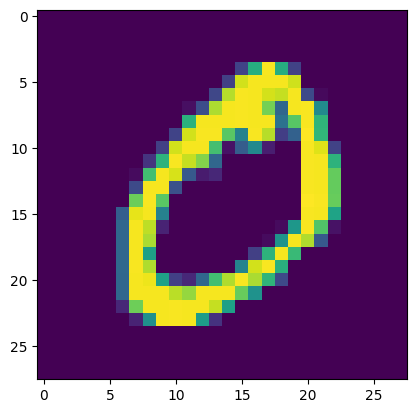

In [3]:
single_image = pixels.loc[1].values.reshape([28,28])
plt.imshow(single_image)
plt.show()

In [9]:
tsne = manifold.TSNE(n_components=2,random_state=777)
transformed_data = tsne.fit_transform(pixels[:3000])
print(transformed_data)

/home/yuma/Desktop/Kaggl-Book/.venv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/yuma/Desktop/Kaggl-Book/.venv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[[ 16.441565  -19.876972 ]
 [ -3.3364584 -69.37704  ]
 [ 54.12251    23.082056 ]
 ...
 [  5.0735235  39.267532 ]
 [-56.296227    4.9967546]
 [ 37.914627   -9.134289 ]]


In [16]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data,targets[:3000])), columns = ["x","y","targets"])
tsne_df.loc[:,"targets"] = tsne_df.loc[:,"targets"].astype(int)
tsne_df

,x,y,targets
0,16.441565,-19.876972,5
1,-3.336458,-69.377037,0
2,54.122509,23.082056,4
3,-32.085766,39.524719,1
4,28.520329,22.907892,9
...,...,...,...
2995,7.994022,49.998646,7
2996,-9.661232,-67.249542,0
2997,5.073524,39.267532,9
2998,-56.296227,4.996755,1


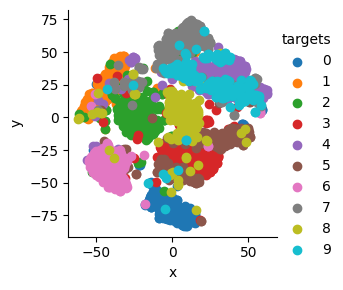

In [18]:
grid = sns.FacetGrid(tsne_df, hue="targets")
grid.map(plt.scatter, "x", "y").add_legend()